In [ ]:
#Kunal Srivsatava, Ayaan Rahim, Lauryn Nakamitsu
#DATA: https://www.kaggle.com/ntnu-testimon/paysim1

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/AML

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/AML


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df =  pd.read_csv("AML_dataset.csv")

print(len(df))

6362620


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
print('Null Values =',df.isnull().values.any())

Null Values = False


In [ ]:
#trash features i dont want
df.drop('nameOrig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)

isFraud
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

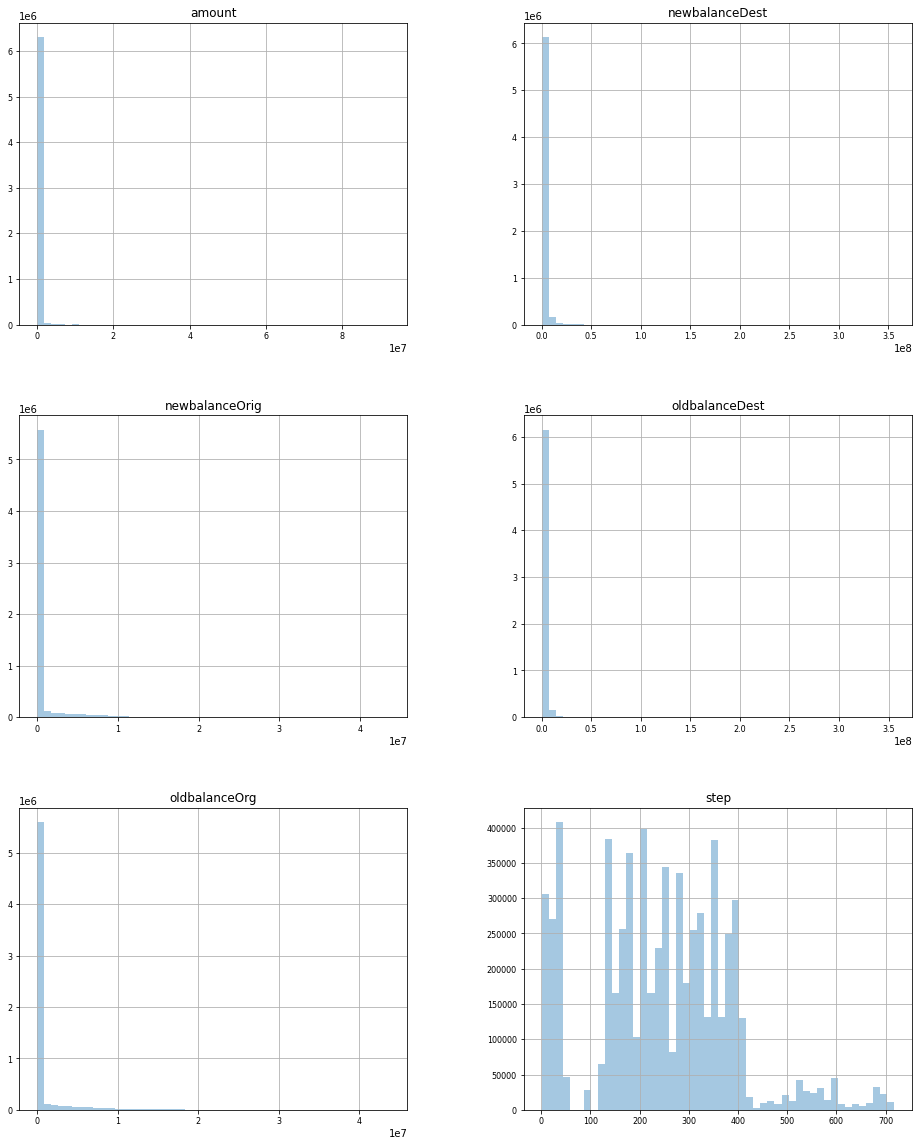

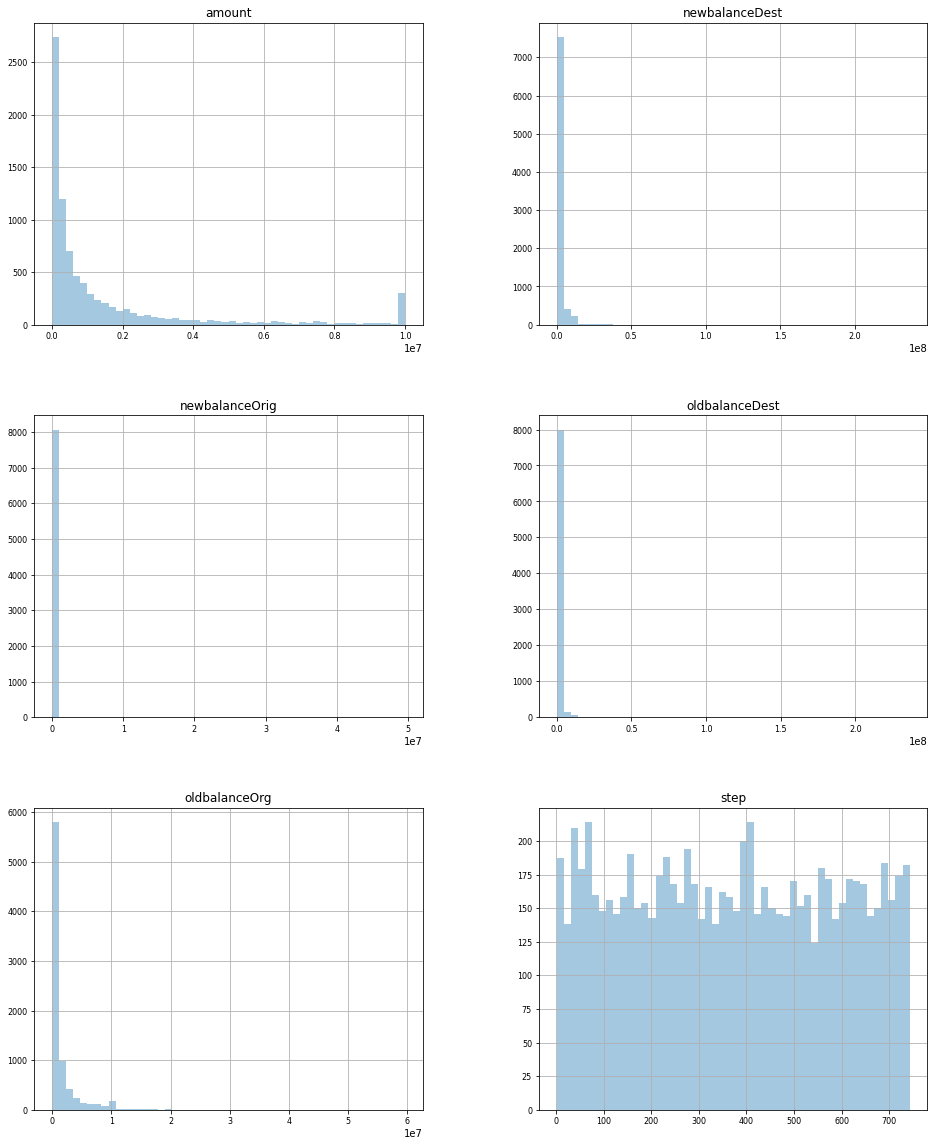

In [ ]:
#visualize fraudulent features
df.groupby('isFraud').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)

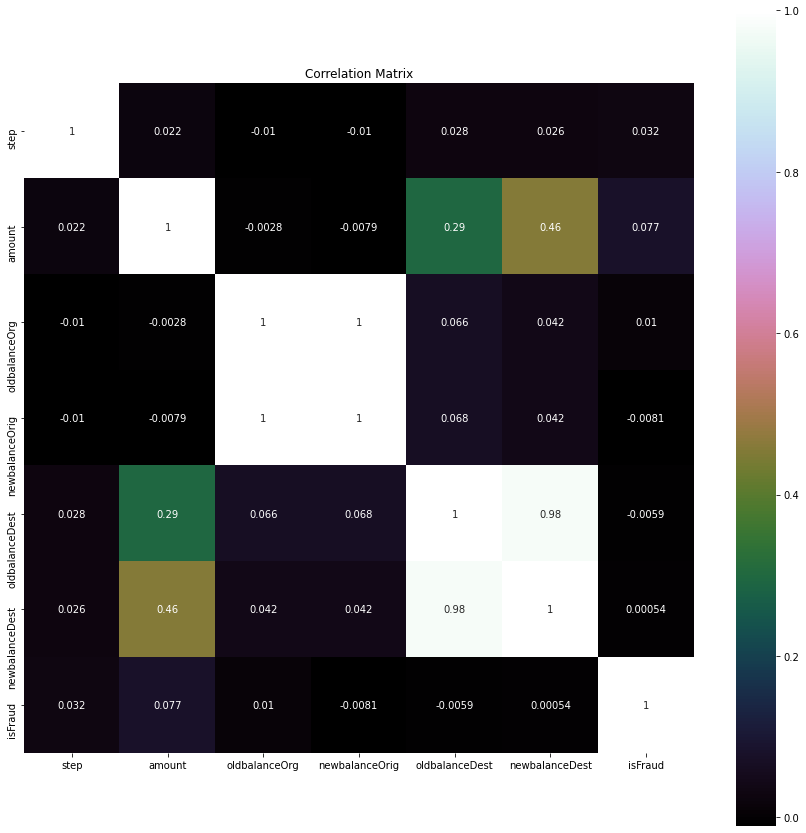

In [ ]:
#correlation matrix to check correlation

correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [ ]:
#creating dummy variables for categorical values
dum = pd.get_dummies(df['type'])
df1 = pd.concat([df,dum],axis=1)
df1.drop(['type'],axis=1, inplace=True)


0    19975
1       25
Name: isFraud, dtype: int64
Before OverSampling, counts of label '1': 19
Before OverSampling, counts of label '0': 13981 

After OverSampling, the shape of train_X: (27962, 11)
After OverSampling, the shape of train_y: (27962,) 

After OverSampling, counts of label '1': 13981
After OverSampling, counts of label '0': 13981


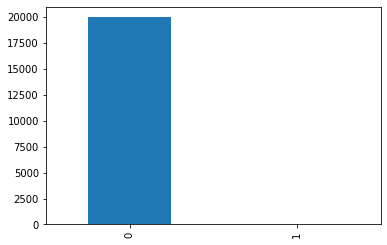

In [ ]:
#is target class balanced
df2 = df1.sample(n=20000)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())

#Splitting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)


#this is to balance the skew in the dataset because there are so little fraudulent cases. 
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=10, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


In [ ]:
#scale features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)


In [ ]:
model = Sequential()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs = 10)


Epoch 1/10
2797/2797 [==============================] - 2s 810us/step - loss: 0.2016 - accuracy: 0.9323
Epoch 2/10
2797/2797 [==============================] - 2s 783us/step - loss: 0.0780 - accuracy: 0.9721
Epoch 3/10
2797/2797 [==============================] - 2s 780us/step - loss: 0.0550 - accuracy: 0.9812
Epoch 4/10
2797/2797 [==============================] - 2s 756us/step - loss: 0.0410 - accuracy: 0.9863
Epoch 5/10
2797/2797 [==============================] - 2s 769us/step - loss: 0.0323 - accuracy: 0.9893
Epoch 6/10
2797/2797 [==============================] - 2s 789us/step - loss: 0.0272 - accuracy: 0.9912
Epoch 7/10
2797/2797 [==============================] - 2s 767us/step - loss: 0.0232 - accuracy: 0.9932
Epoch 8/10
2797/2797 [==============================] - 2s 772us/step - loss: 0.0205 - accuracy: 0.9938
Epoch 9/10
2797/2797 [==============================] - 2s 767us/step - loss: 0.0183 - accuracy: 0.9951
Epoch 10/10
2797/2797 [==============================] - 2s 773u

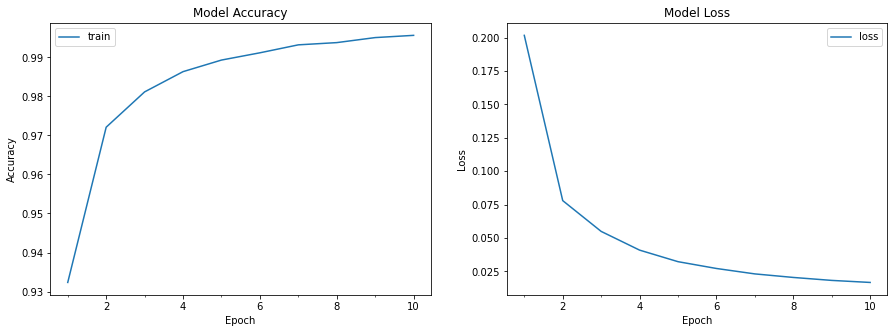

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
        
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train'], loc='best')
        
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['loss'], loc='best')
    plt.show()
    
plot_model_history(model_info)

In [ ]:
#results
#y_pred = model.predict_classes(x_test_scaled)
y_pred = np.argmax(model.predict(x_test_scaled), axis=-1)
acc = accuracy_score(y_test,y_pred)*100
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')
print('Accuracy:',round(acc,2))

Accuracy: 99.9
Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5994
           1       0.00      0.00      0.00         6

    accuracy                           1.00      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       1.00      1.00      1.00      6000
 

Accuracy: 99.9
